## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import ABC_train_test2
import energyefficiencyDataset
import network
import dataset
import sanityChecks
import torch 
import scrapbook as sb
from statistics import mean 
import catboost as ctb 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error
import numpy as np

## Parameters 

In [3]:
variance = 1
bias = 1 

In [4]:
# Parameters
variance = 0.1
bias = 1


## Dataset 


In [5]:
#Parameters 
n_features = 8
n_samples= 768
n_target = 1 

In [6]:
X,Y = energyefficiencyDataset.energy_data()

     X1     X2     X3      X4   X5  X6   X7  X8     Y1     Y2
0  0.98  514.5  294.0  110.25  7.0   2  0.0   0  15.55  21.33
1  0.98  514.5  294.0  110.25  7.0   3  0.0   0  15.55  21.33
2  0.98  514.5  294.0  110.25  7.0   4  0.0   0  15.55  21.33
3  0.98  514.5  294.0  110.25  7.0   5  0.0   0  15.55  21.33
4  0.90  563.5  318.5  122.50  7.0   2  0.0   0  20.84  28.28


In [7]:
#Train test split for dataset 
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2)
train_data = dataset.CustomDataset(X_train,Y_train)
test_data = dataset.CustomDataset(X_test,Y_test)


## Training Parameters 

In [8]:
batch_size = 32
n_epochs = 1000
#Select the device 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# ABC Pre-generator Model 

1. The catboost model is used as a pre-generator model for the ABC-GAN. 
2. The model is first trained on the entire dataset 
3. It generats X,Y pairs and we add some Gaussian noise with mean 0 and variance 1 to it which is then feed as input to the generator.


In [9]:
#Train the Model 
prior_model = ctb.CatBoostRegressor()
prior_model.fit(X_train,Y_train)

Learning rate set to 0.037906


0:	learn: 0.9811787	total: 52.6ms	remaining: 52.6s
1:	learn: 0.9480392	total: 53.4ms	remaining: 26.6s
2:	learn: 0.9196805	total: 53.9ms	remaining: 17.9s
3:	learn: 0.8887837	total: 54.4ms	remaining: 13.5s
4:	learn: 0.8629487	total: 54.6ms	remaining: 10.9s
5:	learn: 0.8346394	total: 55.1ms	remaining: 9.13s
6:	learn: 0.8111973	total: 55.5ms	remaining: 7.87s
7:	learn: 0.7874104	total: 56ms	remaining: 6.94s
8:	learn: 0.7613768	total: 56.4ms	remaining: 6.21s
9:	learn: 0.7392858	total: 56.8ms	remaining: 5.62s
10:	learn: 0.7165682	total: 57.3ms	remaining: 5.15s
11:	learn: 0.6958250	total: 57.7ms	remaining: 4.75s
12:	learn: 0.6766322	total: 58.1ms	remaining: 4.41s
13:	learn: 0.6572569	total: 58.4ms	remaining: 4.12s
14:	learn: 0.6363796	total: 58.8ms	remaining: 3.86s
15:	learn: 0.6175183	total: 59.1ms	remaining: 3.63s
16:	learn: 0.5979622	total: 59.5ms	remaining: 3.44s
17:	learn: 0.5803817	total: 60ms	remaining: 3.27s
18:	learn: 0.5621742	total: 60.4ms	remaining: 3.12s
19:	learn: 0.5464371	total

163:	learn: 0.0491735	total: 158ms	remaining: 803ms
164:	learn: 0.0489576	total: 158ms	remaining: 801ms
165:	learn: 0.0488353	total: 159ms	remaining: 800ms
166:	learn: 0.0486794	total: 160ms	remaining: 797ms
167:	learn: 0.0484637	total: 160ms	remaining: 795ms
168:	learn: 0.0482377	total: 161ms	remaining: 791ms
169:	learn: 0.0480606	total: 161ms	remaining: 788ms
170:	learn: 0.0479155	total: 162ms	remaining: 785ms
171:	learn: 0.0477116	total: 163ms	remaining: 783ms
172:	learn: 0.0475495	total: 163ms	remaining: 780ms
173:	learn: 0.0473767	total: 164ms	remaining: 777ms
174:	learn: 0.0471896	total: 164ms	remaining: 774ms
175:	learn: 0.0470229	total: 165ms	remaining: 771ms
176:	learn: 0.0467772	total: 165ms	remaining: 768ms
177:	learn: 0.0466228	total: 166ms	remaining: 765ms
178:	learn: 0.0464586	total: 166ms	remaining: 762ms
179:	learn: 0.0462299	total: 167ms	remaining: 759ms
180:	learn: 0.0461049	total: 167ms	remaining: 756ms
181:	learn: 0.0459550	total: 168ms	remaining: 753ms
182:	learn: 

230:	learn: 0.0401294	total: 200ms	remaining: 667ms
231:	learn: 0.0399668	total: 202ms	remaining: 667ms
232:	learn: 0.0397219	total: 202ms	remaining: 666ms
233:	learn: 0.0396131	total: 202ms	remaining: 663ms
234:	learn: 0.0395327	total: 203ms	remaining: 660ms
235:	learn: 0.0393445	total: 203ms	remaining: 657ms
236:	learn: 0.0392685	total: 203ms	remaining: 654ms
237:	learn: 0.0392133	total: 204ms	remaining: 652ms
238:	learn: 0.0390727	total: 204ms	remaining: 649ms
239:	learn: 0.0390018	total: 205ms	remaining: 649ms
240:	learn: 0.0387621	total: 206ms	remaining: 648ms
241:	learn: 0.0386126	total: 206ms	remaining: 645ms
242:	learn: 0.0385053	total: 206ms	remaining: 643ms
243:	learn: 0.0383204	total: 207ms	remaining: 641ms
244:	learn: 0.0382326	total: 207ms	remaining: 639ms
245:	learn: 0.0379747	total: 208ms	remaining: 638ms
246:	learn: 0.0379255	total: 209ms	remaining: 636ms
247:	learn: 0.0378607	total: 209ms	remaining: 634ms
248:	learn: 0.0377266	total: 210ms	remaining: 632ms
249:	learn: 

403:	learn: 0.0269906	total: 313ms	remaining: 462ms
404:	learn: 0.0269301	total: 314ms	remaining: 462ms
405:	learn: 0.0268897	total: 315ms	remaining: 461ms
406:	learn: 0.0268636	total: 316ms	remaining: 460ms
407:	learn: 0.0268383	total: 316ms	remaining: 459ms
408:	learn: 0.0268060	total: 317ms	remaining: 458ms
409:	learn: 0.0267644	total: 317ms	remaining: 456ms
410:	learn: 0.0267179	total: 318ms	remaining: 455ms
411:	learn: 0.0266946	total: 318ms	remaining: 454ms
412:	learn: 0.0266571	total: 319ms	remaining: 453ms
413:	learn: 0.0265790	total: 319ms	remaining: 452ms
414:	learn: 0.0265427	total: 320ms	remaining: 450ms
415:	learn: 0.0265198	total: 320ms	remaining: 449ms
416:	learn: 0.0264536	total: 321ms	remaining: 448ms
417:	learn: 0.0264006	total: 321ms	remaining: 447ms
418:	learn: 0.0263323	total: 322ms	remaining: 446ms
419:	learn: 0.0262884	total: 322ms	remaining: 445ms
420:	learn: 0.0262511	total: 323ms	remaining: 444ms
421:	learn: 0.0261830	total: 323ms	remaining: 443ms
422:	learn: 

474:	learn: 0.0239607	total: 355ms	remaining: 393ms
475:	learn: 0.0238992	total: 356ms	remaining: 392ms
476:	learn: 0.0238375	total: 357ms	remaining: 391ms
477:	learn: 0.0238079	total: 357ms	remaining: 390ms
478:	learn: 0.0237681	total: 358ms	remaining: 389ms
479:	learn: 0.0237294	total: 359ms	remaining: 388ms
480:	learn: 0.0237102	total: 359ms	remaining: 387ms
481:	learn: 0.0236893	total: 359ms	remaining: 386ms
482:	learn: 0.0236712	total: 360ms	remaining: 385ms
483:	learn: 0.0236534	total: 360ms	remaining: 384ms
484:	learn: 0.0236212	total: 361ms	remaining: 383ms
485:	learn: 0.0235959	total: 361ms	remaining: 382ms
486:	learn: 0.0235725	total: 362ms	remaining: 381ms
487:	learn: 0.0235354	total: 362ms	remaining: 380ms
488:	learn: 0.0235023	total: 363ms	remaining: 379ms
489:	learn: 0.0234859	total: 363ms	remaining: 378ms
490:	learn: 0.0234659	total: 364ms	remaining: 377ms
491:	learn: 0.0234437	total: 364ms	remaining: 376ms
492:	learn: 0.0234175	total: 367ms	remaining: 378ms
493:	learn: 

625:	learn: 0.0196085	total: 457ms	remaining: 273ms
626:	learn: 0.0195851	total: 458ms	remaining: 272ms
627:	learn: 0.0195590	total: 459ms	remaining: 272ms
628:	learn: 0.0195527	total: 459ms	remaining: 271ms
629:	learn: 0.0195415	total: 460ms	remaining: 270ms
630:	learn: 0.0195292	total: 461ms	remaining: 269ms
631:	learn: 0.0195067	total: 461ms	remaining: 268ms
632:	learn: 0.0194723	total: 461ms	remaining: 268ms
633:	learn: 0.0194487	total: 462ms	remaining: 267ms
634:	learn: 0.0194273	total: 463ms	remaining: 266ms
635:	learn: 0.0193906	total: 463ms	remaining: 265ms
636:	learn: 0.0193699	total: 464ms	remaining: 264ms
637:	learn: 0.0193483	total: 464ms	remaining: 263ms
638:	learn: 0.0193143	total: 465ms	remaining: 262ms
639:	learn: 0.0193021	total: 465ms	remaining: 262ms
640:	learn: 0.0192790	total: 465ms	remaining: 261ms
641:	learn: 0.0192554	total: 466ms	remaining: 260ms
642:	learn: 0.0192276	total: 466ms	remaining: 259ms
643:	learn: 0.0192105	total: 467ms	remaining: 258ms
644:	learn: 

688:	learn: 0.0182116	total: 499ms	remaining: 225ms
689:	learn: 0.0181905	total: 499ms	remaining: 224ms
690:	learn: 0.0181763	total: 500ms	remaining: 224ms
691:	learn: 0.0181632	total: 501ms	remaining: 223ms
692:	learn: 0.0181551	total: 501ms	remaining: 222ms
693:	learn: 0.0181374	total: 502ms	remaining: 221ms
694:	learn: 0.0181077	total: 502ms	remaining: 220ms
695:	learn: 0.0180865	total: 503ms	remaining: 220ms
696:	learn: 0.0180618	total: 503ms	remaining: 219ms
697:	learn: 0.0180346	total: 504ms	remaining: 218ms
698:	learn: 0.0180199	total: 504ms	remaining: 217ms
699:	learn: 0.0180004	total: 504ms	remaining: 216ms
700:	learn: 0.0179714	total: 505ms	remaining: 215ms
701:	learn: 0.0179415	total: 505ms	remaining: 214ms
702:	learn: 0.0179287	total: 505ms	remaining: 214ms
703:	learn: 0.0179002	total: 512ms	remaining: 215ms
704:	learn: 0.0178937	total: 513ms	remaining: 215ms
705:	learn: 0.0178741	total: 513ms	remaining: 214ms
706:	learn: 0.0178453	total: 514ms	remaining: 213ms
707:	learn: 

865:	learn: 0.0152284	total: 605ms	remaining: 93.7ms
866:	learn: 0.0152057	total: 607ms	remaining: 93.1ms
867:	learn: 0.0151882	total: 608ms	remaining: 92.4ms
868:	learn: 0.0151791	total: 608ms	remaining: 91.7ms
869:	learn: 0.0151709	total: 609ms	remaining: 91ms
870:	learn: 0.0151472	total: 609ms	remaining: 90.3ms
871:	learn: 0.0151325	total: 610ms	remaining: 89.5ms
872:	learn: 0.0151238	total: 610ms	remaining: 88.8ms
873:	learn: 0.0151088	total: 611ms	remaining: 88.1ms
874:	learn: 0.0150901	total: 612ms	remaining: 87.4ms
875:	learn: 0.0150705	total: 612ms	remaining: 86.6ms
876:	learn: 0.0150568	total: 613ms	remaining: 85.9ms
877:	learn: 0.0150488	total: 613ms	remaining: 85.2ms
878:	learn: 0.0150342	total: 614ms	remaining: 84.5ms
879:	learn: 0.0150046	total: 614ms	remaining: 83.7ms
880:	learn: 0.0149884	total: 615ms	remaining: 83ms
881:	learn: 0.0149759	total: 615ms	remaining: 82.3ms
882:	learn: 0.0149642	total: 616ms	remaining: 81.6ms
883:	learn: 0.0149491	total: 617ms	remaining: 80.9

927:	learn: 0.0144250	total: 648ms	remaining: 50.3ms
928:	learn: 0.0144210	total: 649ms	remaining: 49.6ms
929:	learn: 0.0144106	total: 649ms	remaining: 48.9ms
930:	learn: 0.0143994	total: 650ms	remaining: 48.2ms
931:	learn: 0.0143909	total: 650ms	remaining: 47.4ms
932:	learn: 0.0143779	total: 650ms	remaining: 46.7ms
933:	learn: 0.0143711	total: 651ms	remaining: 46ms
934:	learn: 0.0143589	total: 651ms	remaining: 45.3ms
935:	learn: 0.0143523	total: 651ms	remaining: 44.5ms
936:	learn: 0.0143399	total: 652ms	remaining: 43.8ms
937:	learn: 0.0143305	total: 653ms	remaining: 43.1ms
938:	learn: 0.0143266	total: 653ms	remaining: 42.4ms
939:	learn: 0.0143118	total: 654ms	remaining: 41.7ms
940:	learn: 0.0143027	total: 654ms	remaining: 41ms
941:	learn: 0.0142895	total: 655ms	remaining: 40.3ms
942:	learn: 0.0142768	total: 656ms	remaining: 39.6ms
943:	learn: 0.0142665	total: 657ms	remaining: 39ms
944:	learn: 0.0142411	total: 657ms	remaining: 38.3ms
945:	learn: 0.0142309	total: 658ms	remaining: 37.6ms

In [10]:
y_pred = prior_model.predict(X_test)
y_abc = y_pred + np.random.normal(0,variance, y_pred.shape) + bias 
mse = mean_squared_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mse)
mse = mean_squared_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mse)
mae = mean_absolute_error(y_pred,Y_test)
sb.glue("Prior Model MAE",mae)
print("Prior Model MAE",mae)
mae = mean_absolute_error(y_abc,Y_test)
print("ABC Pre-generator MAE",mae)

Prior Model MAE 0.01985336766701884
ABC Pre-generator MAE 1.0057761423696898


# mGAN Model

In [11]:
# gen = network.Generator(n_features+1).to(device)
# disc = network.Discriminator(n_features+1).to(device)

# criterion = torch.nn.BCELoss()
# gen_opt = torch.optim.Adam(gen.parameters(), lr=0.01, betas=(0.5, 0.999))
# disc_opt = torch.optim.Adam(disc.parameters(), lr=0.01, betas=(0.5, 0.999))

In [12]:
#Training the ABC_GAN 
# ABC_train_test2.training_GAN(disc,gen,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [13]:
# ABC_GAN1_metrics=ABC_train_test2.test_generator(gen,test_data,prior_model,variance,bias,"1",device)
# sb.glue("ABC_GAN_1 Metrics",ABC_GAN1_metrics)

# print("MAE")
# print(mean(ABC_GAN1_metrics[1]))

In [14]:
# sanityChecks.discProbVsError(train_data,disc,device)
# sanityChecks.discProbVsError(test_data,disc,device)

# mGAN Model with TabNet Generator

In [15]:
gen2 = network.GeneratorTabnet(n_features+1).to(device)
disc2 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen2.parameters(), lr=0.01, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc2.parameters(), lr=0.01, betas=(0.5, 0.999))

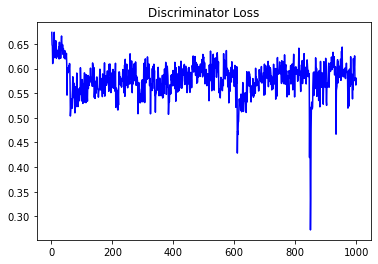

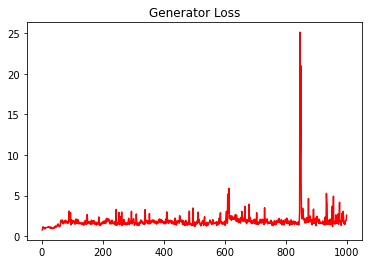

In [16]:
#Training the ABC_GAN 
ABC_train_test2.training_GAN(disc2,gen2,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [17]:
ABC_GAN2_metrics=ABC_train_test2.test_generator(gen2,test_data,prior_model,variance,bias,"1",device)
sb.glue("ABC_GAN_2 Metrics",ABC_GAN2_metrics)

print("MAE")
print(mean(ABC_GAN2_metrics[1]))

MAE
0.07564268354955432


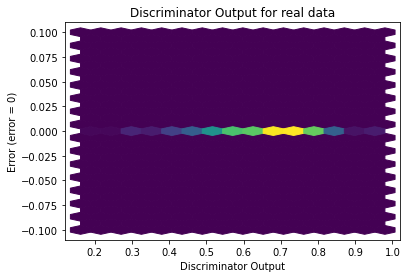

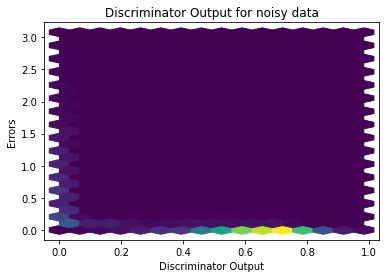

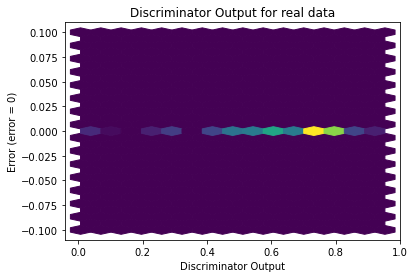

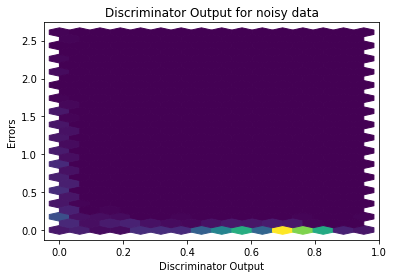

In [18]:
sanityChecks.discProbVsError(train_data,disc2,device)
sanityChecks.discProbVsError(test_data,disc2,device)

# skipGAN Model

In [19]:
#Generator
gen3 = network.GeneratorWithSkipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc3 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen3.parameters(), lr=0.01, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc3.parameters(), lr=0.01, betas=(0.5, 0.999))


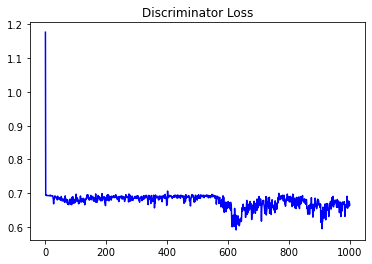

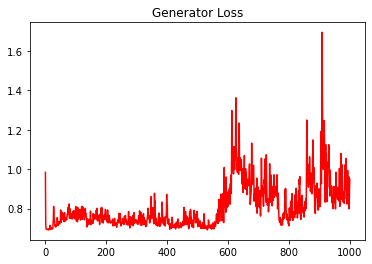

In [20]:
ABC_train_test2.training_GAN_skip_connection(disc3,gen3,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [21]:
ABC_GAN3_metrics=ABC_train_test2.test_generator(gen3,test_data,prior_model,variance,bias,"3",device)
sb.glue("ABC_GAN_3 Metrics",ABC_GAN3_metrics)

print("MAE")
print(mean(ABC_GAN3_metrics[1]))

MAE
0.0559586175047345


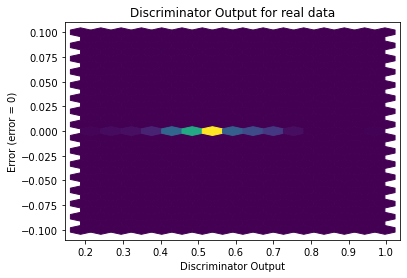

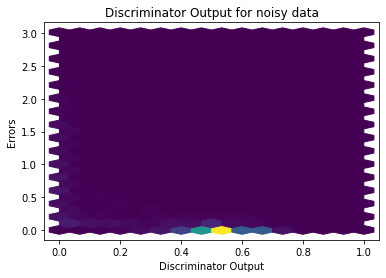

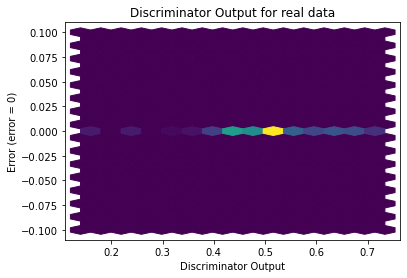

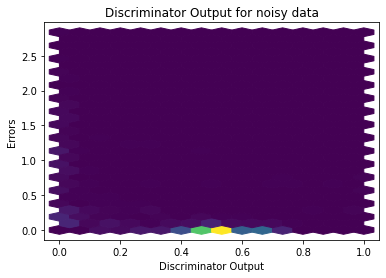

In [22]:
sanityChecks.discProbVsError(train_data,disc3,device)
sanityChecks.discProbVsError(test_data,disc3,device)

# skipGAN Model with TabNet Generator

In [23]:
#Generator
gen4 = network.GeneratorTabnetskipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc4 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen4.parameters(), lr=0.01, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc4.parameters(), lr=0.01, betas=(0.5, 0.999))


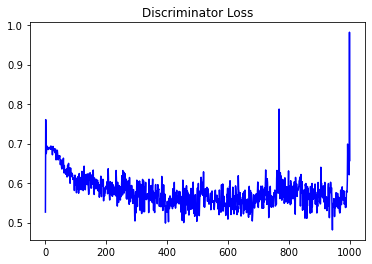

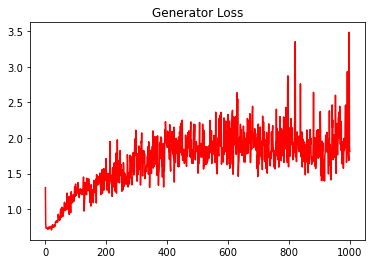

In [24]:
ABC_train_test2.training_GAN_skip_connection(disc4,gen4,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [25]:
ABC_GAN4_metrics=ABC_train_test2.test_generator(gen4,test_data,prior_model,variance,bias,"3",device)
sb.glue("ABC_GAN_4 Metrics",ABC_GAN4_metrics)

print("MAE")
print(mean(ABC_GAN4_metrics[1]))

MAE
0.07215231246375418


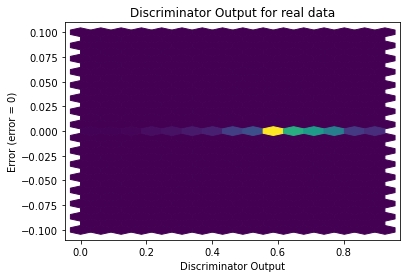

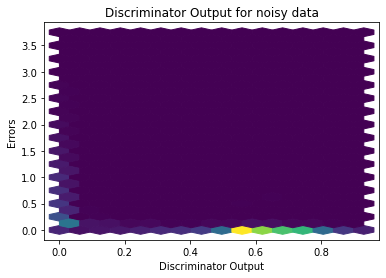

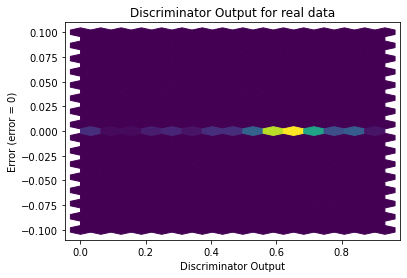

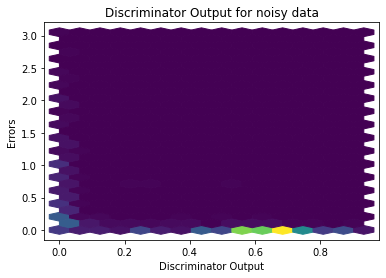

In [26]:
sanityChecks.discProbVsError(train_data,disc4,device)
sanityChecks.discProbVsError(test_data,disc4,device)

## Skip Connection Model Analysis - ABC-GAN 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [27]:
print("Weight of the node at skip connection")
for name,param in gen3.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.2215]], requires_grad=True)


## skipGAN Model Analysis (TabNet Generator) 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [28]:
print("Weight of the node at skip connection")
for name,param in gen4.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.3134]], requires_grad=True)
